In [2]:


import numpy as np
from matplotlib import pyplot as plt

In [3]:


n = 1000

sigma = 1
w = 5 * sigma
x = np.arange(-w,w,1/n)

y = np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
y = y / np.max(y)  # Normalize the function to the range [0, 1]
y_ext = np.where(y > 0.9, 20*y, y)

# Smoothing kernel
smoothing_sigma = 0.5
# kernel = np.exp(-x**2 / (2 * smoothing_sigma**2)) / (smoothing_sigma * np.sqrt(2 * np.pi)) / n
scale  = 2
kernel = np.exp(-np.abs(x) / scale)
# Normalize the kernel
kernel = kernel / np.sum(kernel)  # Ensure the kernel sums to 1
# Convolve both functions with the smoothing kernel
y_convolved = np.convolve(y, kernel, mode='same')
y_ext_convolved = np.convolve(y_ext, kernel, mode='same')


[]

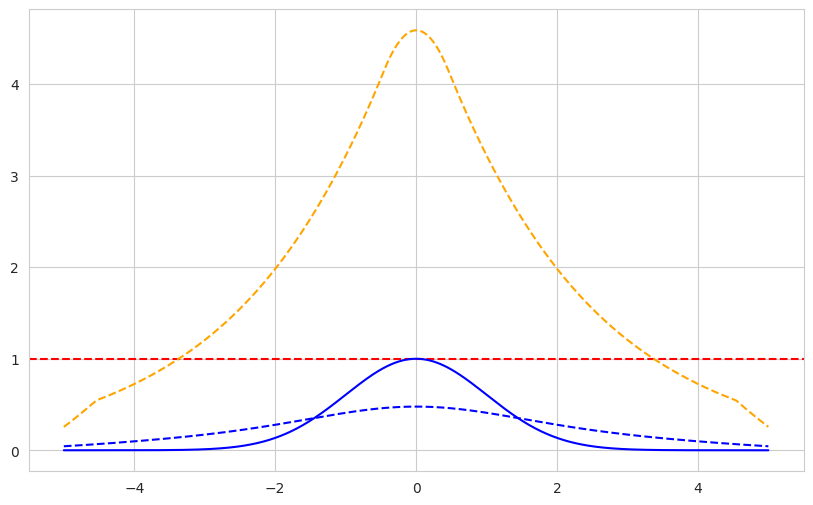

In [5]:
exposure_limit = 1
# Plot the exposure limit as a red dotted line
plt.figure(figsize=(10, 6))
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exposure Limit (1)')
plt.plot(x, y, label='f(x) = exp(-x^2)', color='blue')
# plt.plot(x, y_ext, label='f(x) = exp(-x^2) with extension', color='orange')
# plt.plot(x, kernel, label='Smoothing Kernel', color='green', linestyle='--')
plt.plot(x, y_convolved, label='Convolved f(x)', color='blue', linestyle='--')
plt.plot(x, y_ext_convolved, label='Convolved f(x) with extension', color='orange', linestyle='--')
plt.plot()  

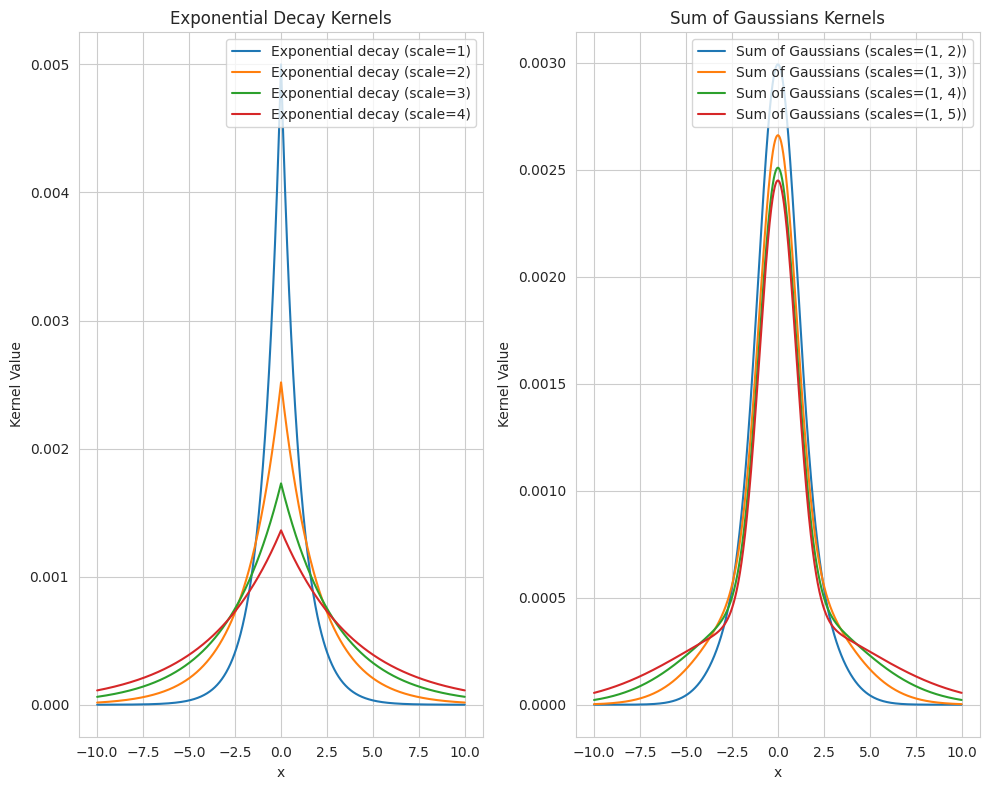

In [63]:
def exp_decay(x, scale):
    """Exponential decay function. Normalized to sum to 1."""
    kernel = np.exp(-np.abs(x) / scale)
    return kernel / np.sum(kernel)  # Ensure the kernel sums to 1
def sum_of_gaussians(x, *scales):
    """Sum of Gaussian functions with different scales."""
    kernel = np.sum([np.exp(-x**2 / (2 * scale**2)) / (scale * np.sqrt(2 * np.pi)) for scale in scales], axis=0)
    return kernel / np.sum(kernel)  # Ensure the kernel sums to 1


kernel_exp_hyperparams = [(1,), (2,), (3,), (4,)]
exp_kernels = [ exp_decay, exp_decay, exp_decay, exp_decay]

kernel_sog_hyperparams = [(1,2), (1,3), (1,4), (1,5)]
sog_kernels = [sum_of_gaussians, sum_of_gaussians, sum_of_gaussians, sum_of_gaussians]

# plot the kernels
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

for i, (kernel, hyperparams) in enumerate(zip(exp_kernels, kernel_exp_hyperparams)):
    x = np.arange(-10, 10, 0.01)
    y = kernel(x, *hyperparams)
    ax[0].plot(x, y, label=f'Exponential decay (scale={hyperparams[0]})')
for i, (kernel, hyperparams) in enumerate(zip(sog_kernels, kernel_sog_hyperparams)):
    x = np.arange(-10, 10, 0.01)
    y = kernel(x, *hyperparams)
    ax[1].plot(x, y, label=f'Sum of Gaussians (scales={hyperparams})')
ax[0].set_title('Exponential Decay Kernels')
ax[1].set_title('Sum of Gaussians Kernels')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('Kernel Value')
ax[1].set_ylabel('Kernel Value')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()



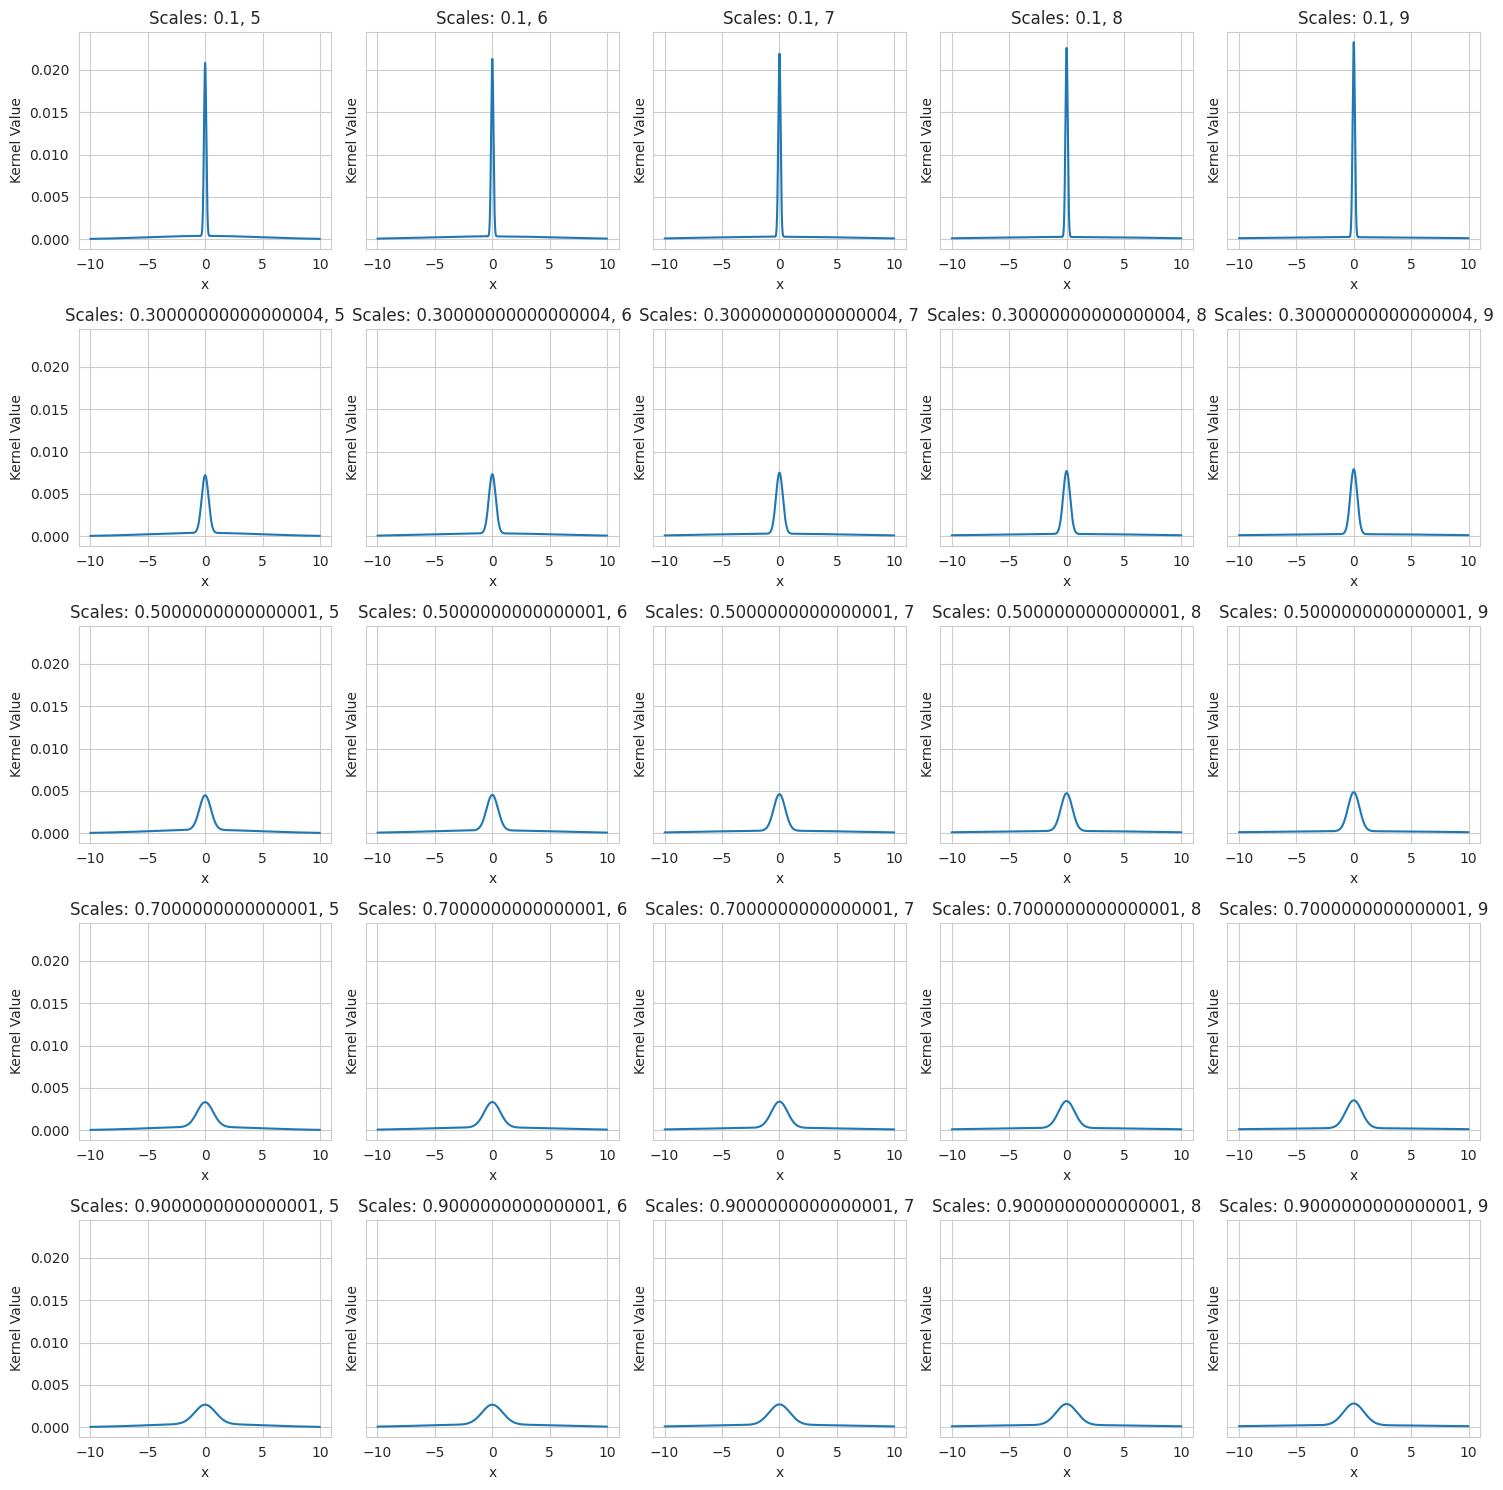

In [70]:
# Plot sum of gaussians with different scales in a matrix for 5x5 different scale combinations.
# have the y axis be the same for all plots
fig, axs = plt.subplots(5, 5, figsize=(15, 15), sharey=True)
x = np.arange(-10, 10, 0.01)
# Set y-axis limits for the first plot
for i, scale1 in enumerate(np.arange(0.1, 1.1, 0.2)):
    for j, scale2 in enumerate(range(5, 10)):
        y = sum_of_gaussians(x, scale1, scale2)
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f'Scales: {scale1}, {scale2}')
        axs[i, j].set_xlabel('x')
        axs[i, j].set_ylabel('Kernel Value')
        axs[i, j].grid(True)    
plt.tight_layout()  


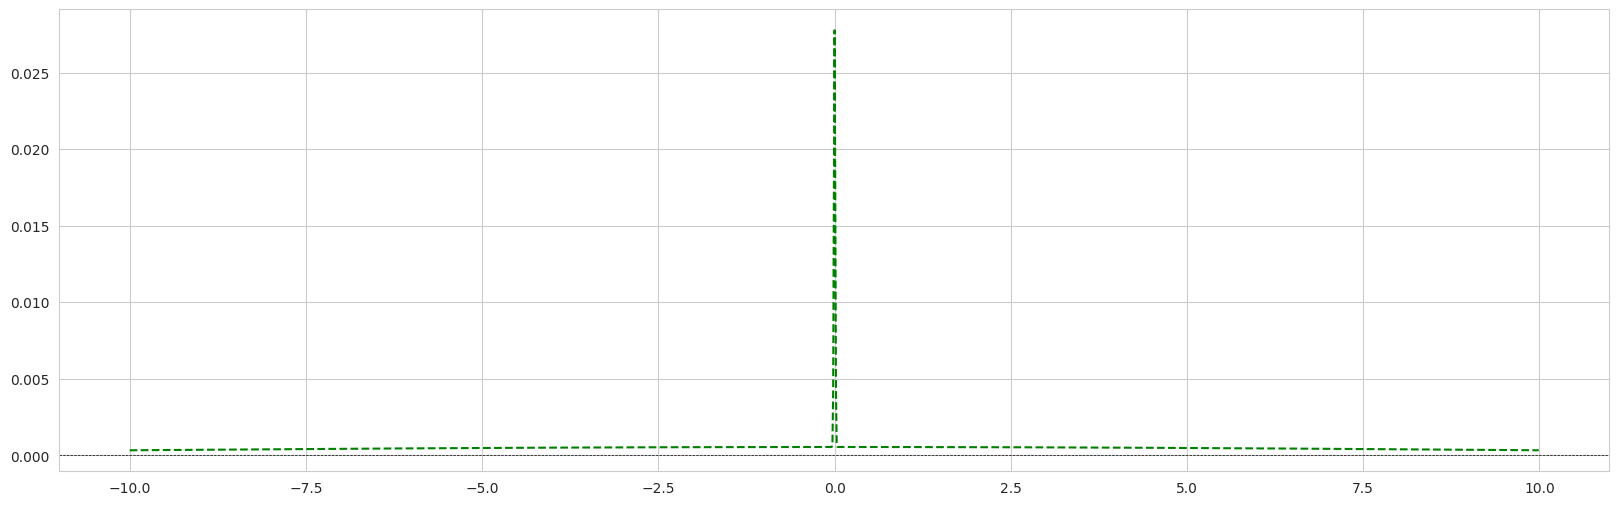

In [88]:
"""Sum of Gaussian functions with different scales."""
sigma1 = 0.01
sigma2 = 10
ratio = 20
g1 = np.exp(-np.arange(-10, 10, 0.01)**2 / (2 * sigma1**2)) / (sigma1 * np.sqrt(2 * np.pi))
g2 = ratio * np.exp(-np.arange(-10, 10, 0.01)**2 / (2 * sigma2**2)) / (sigma2 * np.sqrt(2 * np.pi))
g_sum = g1 + g2
# Normalize the sum to ensure it sums to 1
g_sum /= np.sum(g_sum)
g1 /= np.sum(g1)
g2 /= np.sum(g2)
# Plot the individual Gaussian functions and their sum
plt.figure(figsize=(20, 6))
# plt.plot(x, g1, label=f'Gaussian 1 (scale={scale1})', color='blue')
# plt.plot(x, g2, label=f'Gaussian 2 (scale={scale2})', color='orange')
plt.plot(x, g_sum, label='Sum of Gaussians', color='green', linestyle='--')
# Show the zero line
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.show()

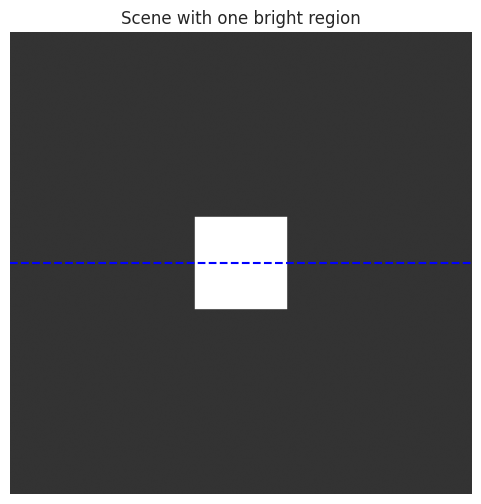

In [109]:

import numpy as np
from matplotlib import pyplot as plt

width = 500
image = np.zeros((width*2,width*2)) + 2
image[width-100:width+100, width-100:width+100] = 10  # Create a small square in the center of the image
# Dont show gridlines
plt.figure(figsize=(6, 6))
plt.axis('off')  # Hide the axes
# Draw line showing the 1d cut
plt.axhline(width, color='blue', linestyle='--', label='1D Cut Line')
plt.title('Scene with one bright region')
plt.imshow(image, cmap='gray', vmin=0, vmax=10)  # Set vmin and vmax to control the color scale


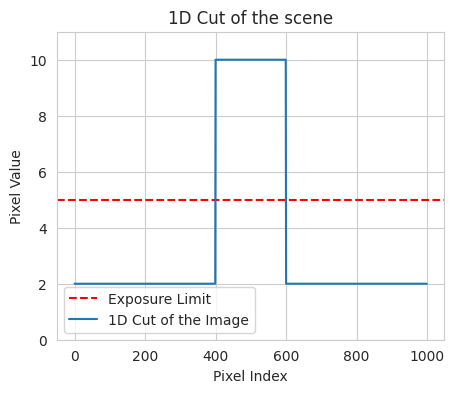

In [114]:
# 1d cut of the image
exposure_limit = 5
cut = image[width, :]
plt.figure(figsize=(5, 4))
plt.title('1D Cut of the scene')
plt.ylim(0, 11)
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exposure Limit')
plt.plot(cut, label='1D Cut of the Image')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.legend()

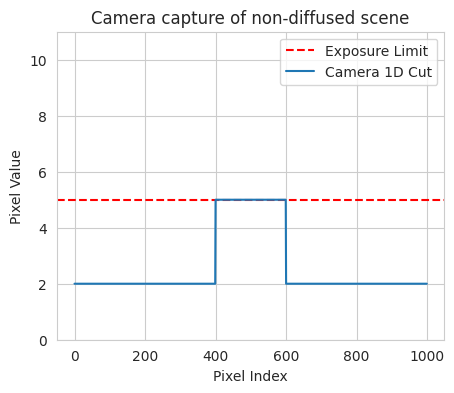

In [115]:
# Image captured with a camera with a 1D cut with same y-axis as the previous plot
camera_cut = cut.copy()
camera_cut[cut > exposure_limit] = exposure_limit  # Clip values above the exposure limit
plt.figure(figsize=(5, 4))
plt.ylim(0, 11)  
plt.title('Camera capture of non-diffused scene')
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exposure Limit')
plt.plot(camera_cut, label='Camera 1D Cut')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()


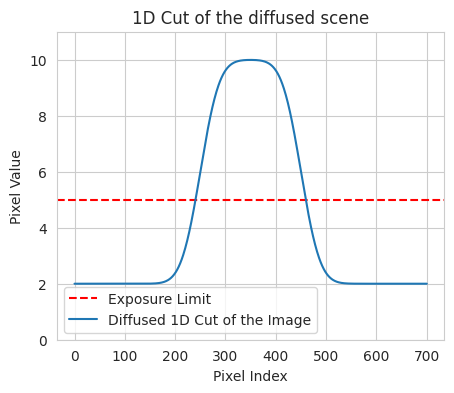

In [119]:
 
# Convolve the convolve 1d scene pre cut with a Gaussian kernel
def gaussian_kernel(size, sigma):
    """Generates a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x: (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size,)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel
def convolve_1d(signal, kernel):
    """Convolves a 1D signal with a kernel."""
    extended_signal = np.pad(signal, (len(kernel) // 2, len(kernel) // 2), mode='edge')  # Pad the signal
    convolved_signal = np.convolve(extended_signal, kernel, mode='valid')  # Convolve with the kernel
    # Return the convolved signal, centered to match the original signal length
    return convolved_signal[len(kernel) // 2:len(convolved_signal) - len(kernel) // 2]
sigma = 30  # Standard deviation of the Gaussian kernel
kernel_size = sigma * 10  # Size of the Gaussian kernel
kernel = gaussian_kernel(kernel_size, sigma)

# Convolve the 1D cut of the image with the Gaussian kernel
convolved_cut = convolve_1d(cut, kernel)
# Plot the convolved cut
plt.figure(figsize=(5, 4))
plt.title('1D Cut of the diffused scene')
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exposure Limit')
plt.plot(convolved_cut, label='Diffused 1D Cut of the Image')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.ylim(0, 11)  # Set y-axis limit to the exposure limit
plt.legend()
plt.show()




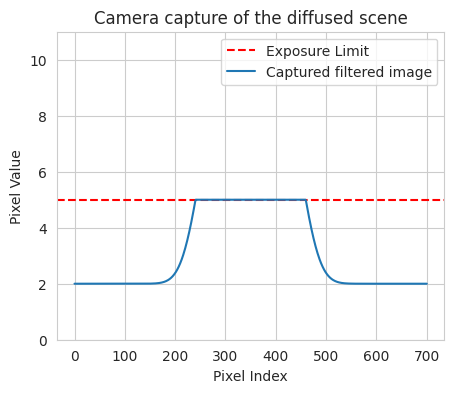

In [117]:
 
# Show convolved image as a camera capture
camera_convolved_cut = convolved_cut.copy()
camera_convolved_cut[camera_convolved_cut > exposure_limit] = exposure_limit  # Clip values above the exposure limit
plt.figure(figsize=(5, 4))
plt.title('Camera capture of the diffused scene')
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exposure Limit')
plt.plot(camera_convolved_cut, label='Captured filtered image')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.ylim(0, 11)  # Set y-axis limit to the exposure limit
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Show the zero line

plt.legend()
plt.show()

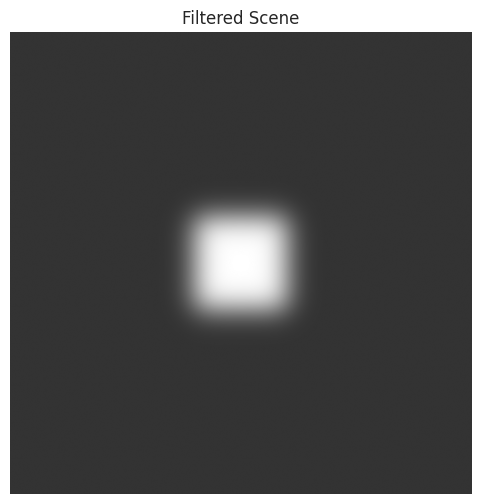

In [118]:
from cv2 import GaussianBlur
# Show the 2d image filtered with the Gaussian kernel using separable convolution
filtered_image = image.copy()
# Convolve the image with the Gaussian kernel using separable convolution
filtered_image = GaussianBlur(filtered_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
plt.figure(figsize=(6, 6))
plt.axis('off')  # Hide the axes
plt.title('Filtered Scene')
plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=10)  # Set vmin and vmax to control the color scale
plt.show()


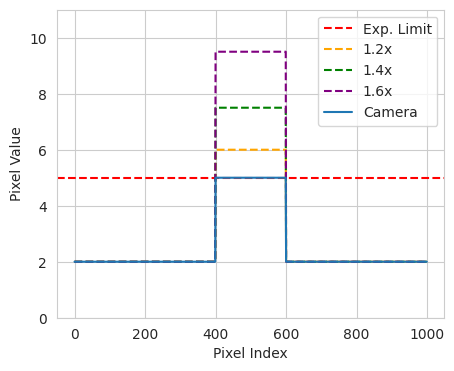

In [131]:
# Image captured with a camera with a 1D cut with same y-axis as the previous plot
camera_cut = cut.copy()
camera_cut[cut > exposure_limit] = exposure_limit  # Clip values above the exposure limit
camera_cut_extended_1 = camera_cut.copy()
camera_cut_extended_1[camera_cut == exposure_limit] *= 1.2
camera_cut_extended_2 = camera_cut.copy()
camera_cut_extended_2[camera_cut == exposure_limit] *= 1.5
camera_cut_extended_3 = camera_cut.copy()
camera_cut_extended_3[camera_cut == exposure_limit] *= 1.9

plt.figure(figsize=(5, 4))
plt.ylim(0, 11)
# plt.title('Camera capture of non-diffused scene')
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exp. Limit')
plt.plot(camera_cut_extended_1, label='1.2x', color='orange', linestyle='--')
plt.plot(camera_cut_extended_2, label='1.4x', color='green', linestyle='--')
plt.plot(camera_cut_extended_3, label='1.6x', color='purple', linestyle='--')
plt.plot(camera_cut, label='Camera')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()

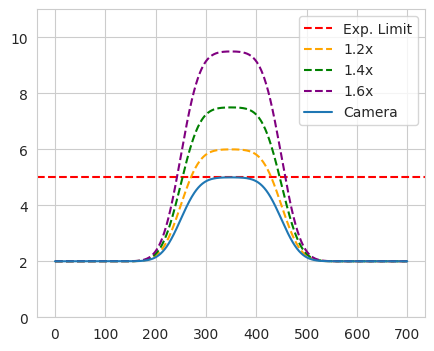

In [132]:
# Smoothed camera cut with different exposure limits
camera_extended_smoothed_1 = camera_cut_extended_1.copy()
# Blur the camera cut with the Gaussian kernel
camera_extended_smoothed_1 = convolve_1d(camera_cut_extended_1, kernel)
camera_extended_smoothed_2 = camera_cut_extended_2.copy()
camera_extended_smoothed_2 = convolve_1d(camera_cut_extended_2, kernel)
camera_extended_smoothed_3 = camera_cut_extended_3.copy()
camera_extended_smoothed_3 = convolve_1d(camera_cut_extended_3, kernel)
camera_cut_smoothed = convolve_1d(camera_cut, kernel)

plt.figure(figsize=(5, 4))
plt.ylim(0, 11)
# plt.title('Camera capture of non-diffused scene with smoothing')
plt.axhline(exposure_limit, color='red', linestyle='--', label='Exp. Limit')
plt.plot(camera_extended_smoothed_1, label='1.2x', color='orange', linestyle='--')
plt.plot(camera_extended_smoothed_2, label='1.4x', color='green', linestyle='--')
plt.plot(camera_extended_smoothed_3, label='1.6x', color='purple', linestyle='--')
plt.plot(camera_cut_smoothed, label='Camera')
plt.legend()
